# Notebook 2: Data Visualization and Exploratory Data Analysis

##  Objective

This notebook focuses on understanding the UNSW-NB15 dataset through comprehensive visualizations. We will:

1. Load the preprocessed data
2. Examine dataset statistics and distributions
3. Visualize class imbalance
4. Analyze feature distributions (normal vs attack)
5. Create correlation heatmaps
6. Visualize sequence patterns
7. Generate insights for model development

---

##  Why Visualization Matters in Cybersecurity

**In intrusion detection:**
- Helps identify distinguishing features between normal and attack traffic
- Reveals data quality issues early
- Guides feature engineering decisions
- Provides insights into attack patterns
- Validates preprocessing steps

---

## Step 1: Import Required Libraries

We'll use:
- **seaborn**: Statistical data visualization (primary plotting library)
- **matplotlib**: Base plotting functionality
- **pandas & numpy**: Data manipulation
- **pickle**: Load preprocessed objects

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print(" Libraries imported successfully!")

 Libraries imported successfully!


## Step 2: Load Preprocessed Data

We'll load the data that was saved in Notebook 1.

In [2]:
# Load sequences
print(" Loading preprocessed data...")
X_train = np.load('preprocessed_data/X_train.npy')
X_train_normal = np.load('preprocessed_data/X_train_normal.npy')
X_val = np.load('preprocessed_data/X_val.npy')
X_test = np.load('preprocessed_data/X_test.npy')
y_train = np.load('preprocessed_data/y_train.npy')
y_val = np.load('preprocessed_data/y_val.npy')
y_test = np.load('preprocessed_data/y_test.npy')

# Load feature names
with open('preprocessed_data/feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

print(f"\n Data loaded successfully!")
print(f"   - Training sequences: {X_train.shape}")
print(f"   - Validation sequences: {X_val.shape}")
print(f"   - Test sequences: {X_test.shape}")
print(f"   - Number of features: {len(feature_names)}")

 Loading preprocessed data...

 Data loaded successfully!
   - Training sequences: (36073, 10, 42)
   - Validation sequences: (7730, 10, 42)
   - Test sequences: (7730, 10, 42)
   - Number of features: 42


## Step 3: Dataset Overview Statistics

Let's examine the basic statistics of our preprocessed dataset.

In [3]:
# Combine all data for overall statistics
X_all = np.concatenate([X_train, X_val, X_test], axis=0)
y_all = np.concatenate([y_train, y_val, y_test], axis=0)

print(" Dataset Statistics:")
print(f"   - Total sequences: {len(X_all):,}")
print(f"   - Sequence length: {X_all.shape[1]} flows")
print(f"   - Features per flow: {X_all.shape[2]}")
print(f"\n   - Normal sequences: {np.sum(y_all == 0):,} ({np.sum(y_all == 0) / len(y_all) * 100:.2f}%)")
print(f"   - Attack sequences: {np.sum(y_all == 1):,} ({np.sum(y_all == 1) / len(y_all) * 100:.2f}%)")

 Dataset Statistics:
   - Total sequences: 51,533
   - Sequence length: 10 flows
   - Features per flow: 42

   - Normal sequences: 16,981 (32.95%)
   - Attack sequences: 34,552 (67.05%)


## Step 4: Visualize Class Distribution

Understanding class balance is crucial for:
- Identifying potential bias in the model
- Deciding on sampling strategies
- Choosing appropriate evaluation metrics

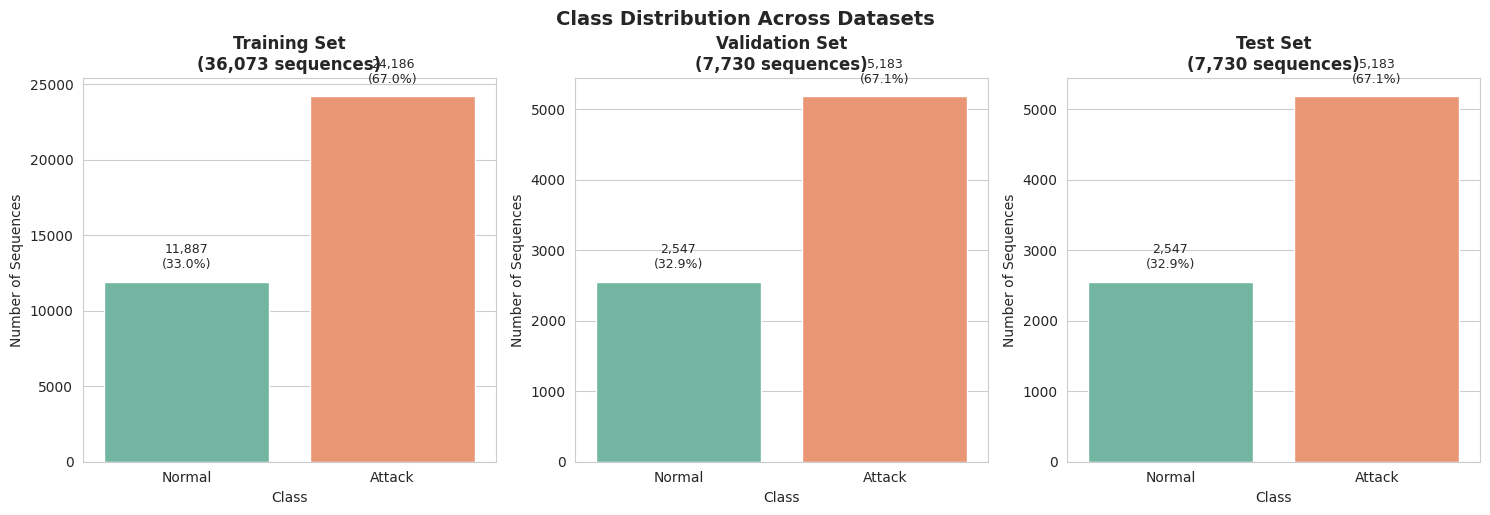

 Class distribution visualized!


In [4]:
# Create figure with subplots for train, val, and test distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

datasets = [
    ('Training Set', y_train),
    ('Validation Set', y_val),
    ('Test Set', y_test)
]

for idx, (title, labels) in enumerate(datasets):
    # Count normal and attack sequences
    counts = pd.Series(labels).value_counts().sort_index()
    
    # Create bar plot
    sns.barplot(x=['Normal', 'Attack'], y=counts.values, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{title}\n({len(labels):,} sequences)', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Number of Sequences', fontsize=10)
    axes[idx].set_xlabel('Class', fontsize=10)
    
    # Add count labels on bars
    for i, v in enumerate(counts.values):
        axes[idx].text(i, v + len(labels) * 0.02, f'{v:,}\n({v/len(labels)*100:.1f}%)', 
                      ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('Class Distribution Across Datasets', fontsize=14, fontweight='bold', y=1.02)
plt.show()

print(" Class distribution visualized!")

## Step 5: Feature Distribution Analysis

We'll analyze how feature distributions differ between normal and attack traffic. This helps identify discriminative features.

In [5]:
# Flatten sequences to get individual flows for feature analysis
# Take the first flow from each sequence for simplicity
X_train_flat = X_train[:, 0, :]  # Shape: (num_sequences, num_features)

# Create DataFrame for easier plotting
df_viz = pd.DataFrame(X_train_flat, columns=feature_names)
df_viz['label'] = y_train
df_viz['class'] = df_viz['label'].map({0: 'Normal', 1: 'Attack'})

print(f" Created visualization DataFrame with shape: {df_viz.shape}")

 Created visualization DataFrame with shape: (36073, 44)


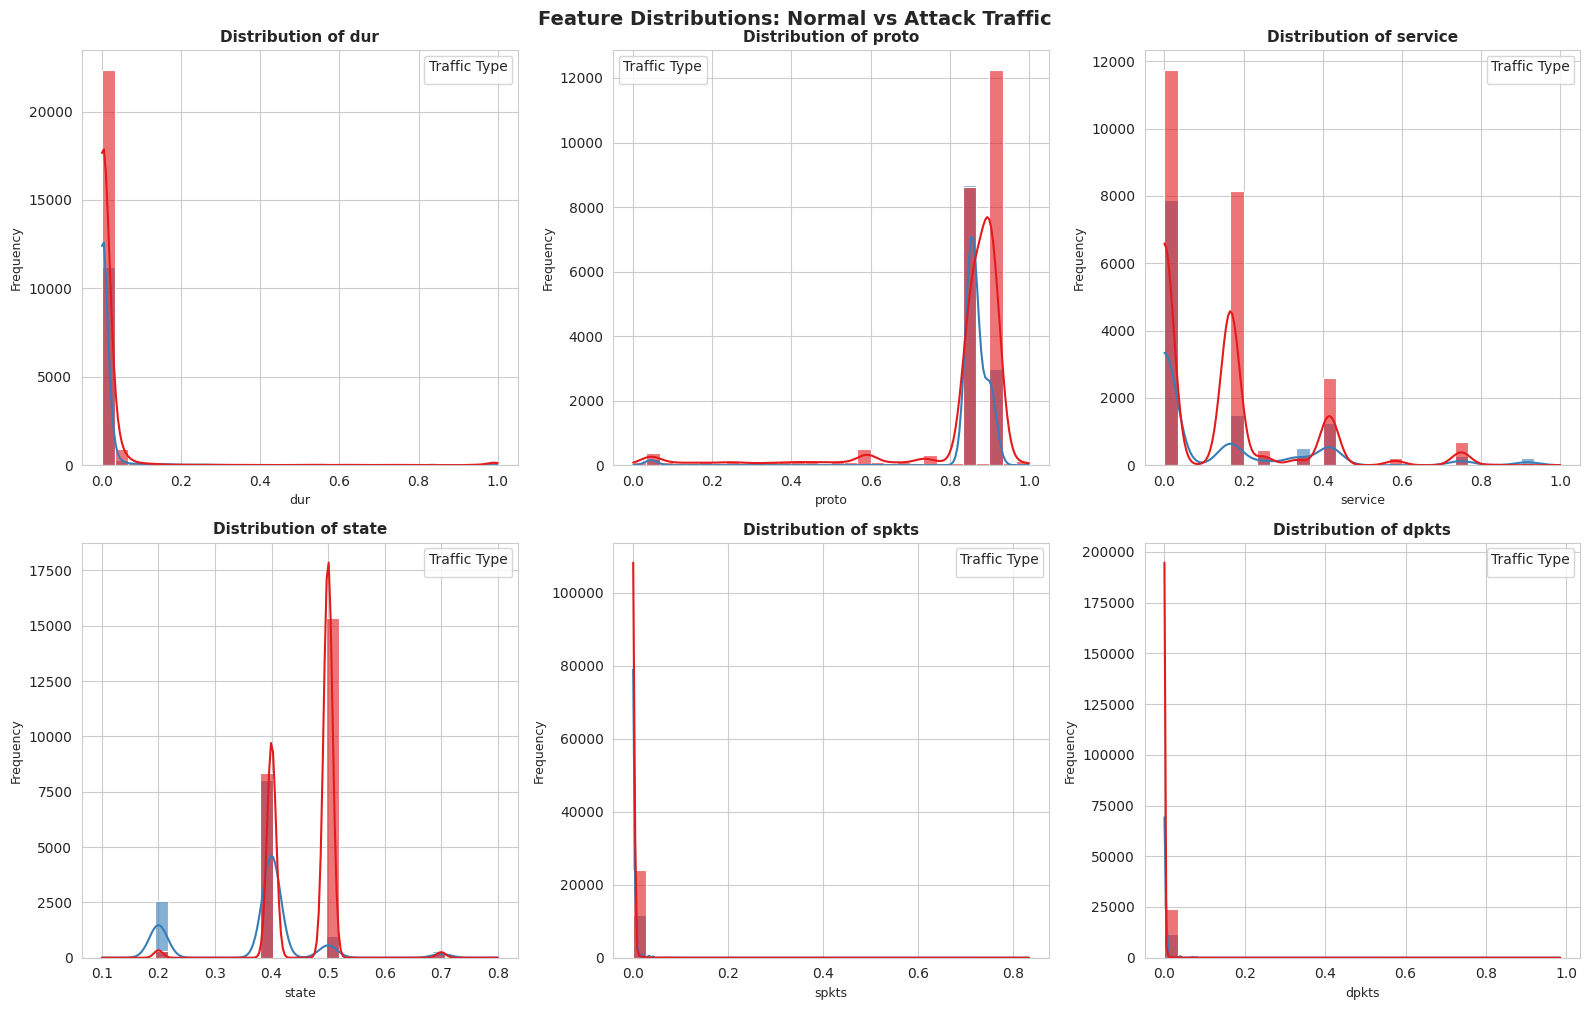

 Feature distributions plotted!


In [6]:
# Select a few important features to visualize
# You can adjust these based on your dataset's actual feature names
features_to_plot = feature_names[:6]  # First 6 features as example

# Create distribution plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    # Create histogram with KDE for normal and attack traffic
    sns.histplot(data=df_viz, x=feature, hue='class', kde=True, 
                 ax=axes[idx], palette='Set1', alpha=0.6, bins=30)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].legend(title='Traffic Type', fontsize=8)

plt.tight_layout()
plt.suptitle('Feature Distributions: Normal vs Attack Traffic', 
             fontsize=14, fontweight='bold', y=1.005)
plt.show()

print(" Feature distributions plotted!")

## Step 6: Box Plots for Feature Comparison

Box plots help visualize:
- Median values
- Quartile ranges
- Outliers
- Differences between normal and attack traffic

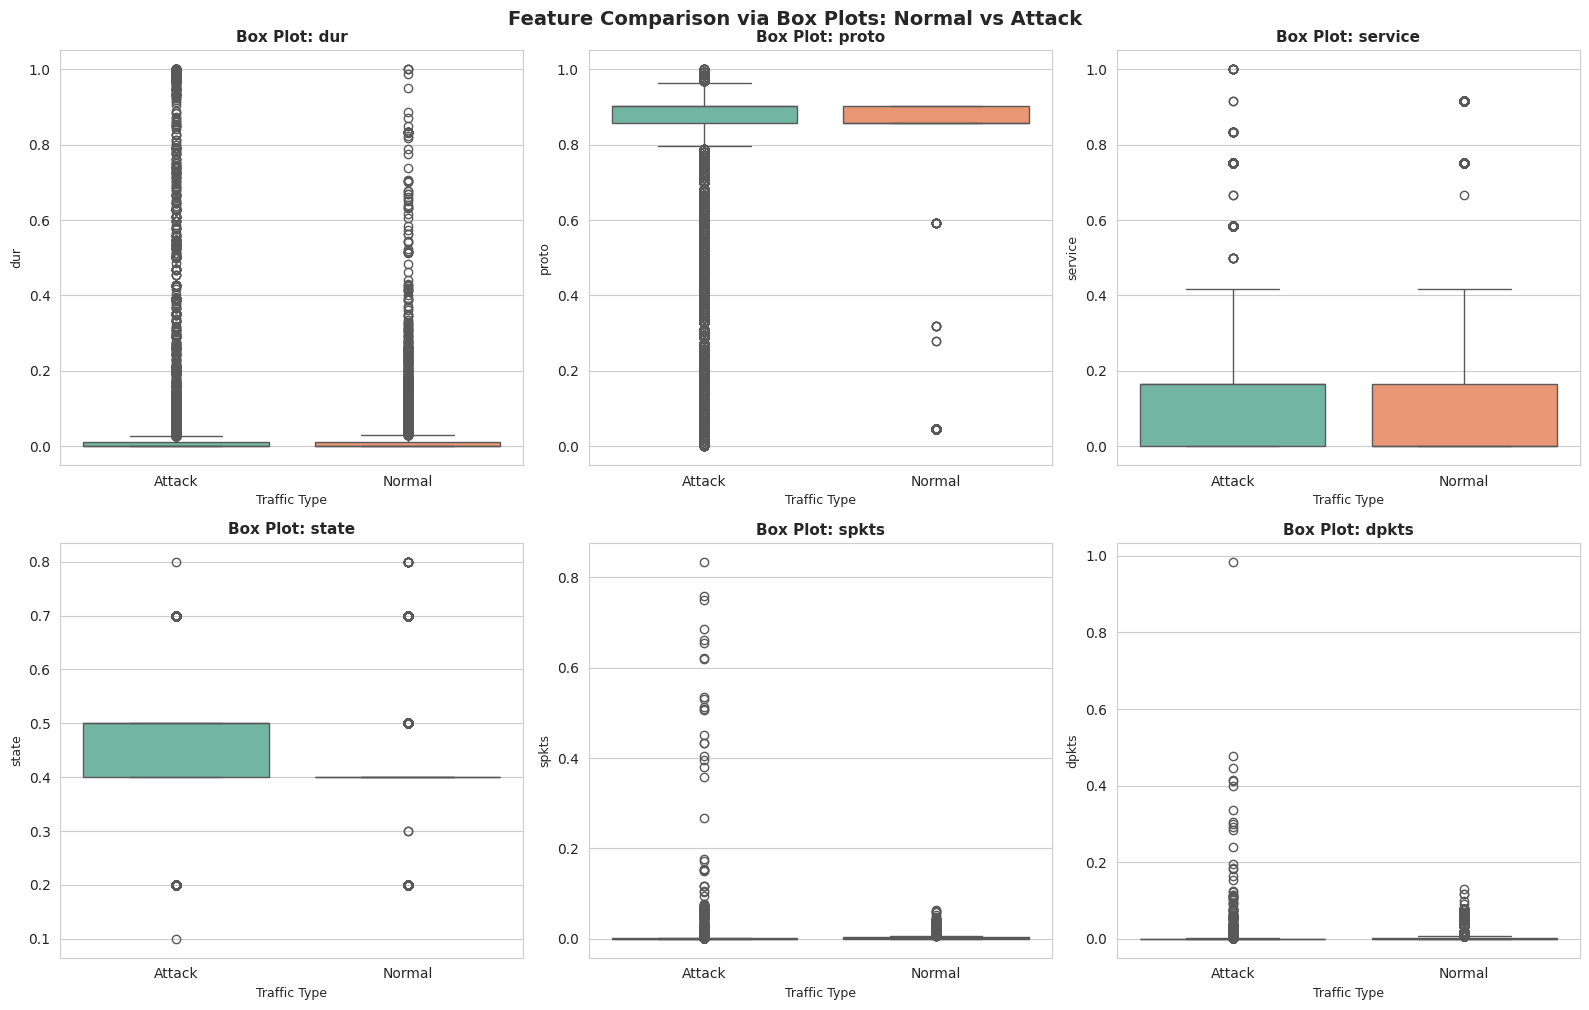

 Box plots created!


In [7]:
# Create box plots for selected features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_plot):
    sns.boxplot(data=df_viz, x='class', y=feature, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Box Plot: {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Traffic Type', fontsize=9)
    axes[idx].set_ylabel(feature, fontsize=9)

plt.tight_layout()
plt.suptitle('Feature Comparison via Box Plots: Normal vs Attack', 
             fontsize=14, fontweight='bold', y=1.005)
plt.show()

print(" Box plots created!")

## Step 7: Correlation Heatmap

Correlation analysis helps:
- Identify redundant features
- Understand feature relationships
- Detect multicollinearity
- Guide feature selection

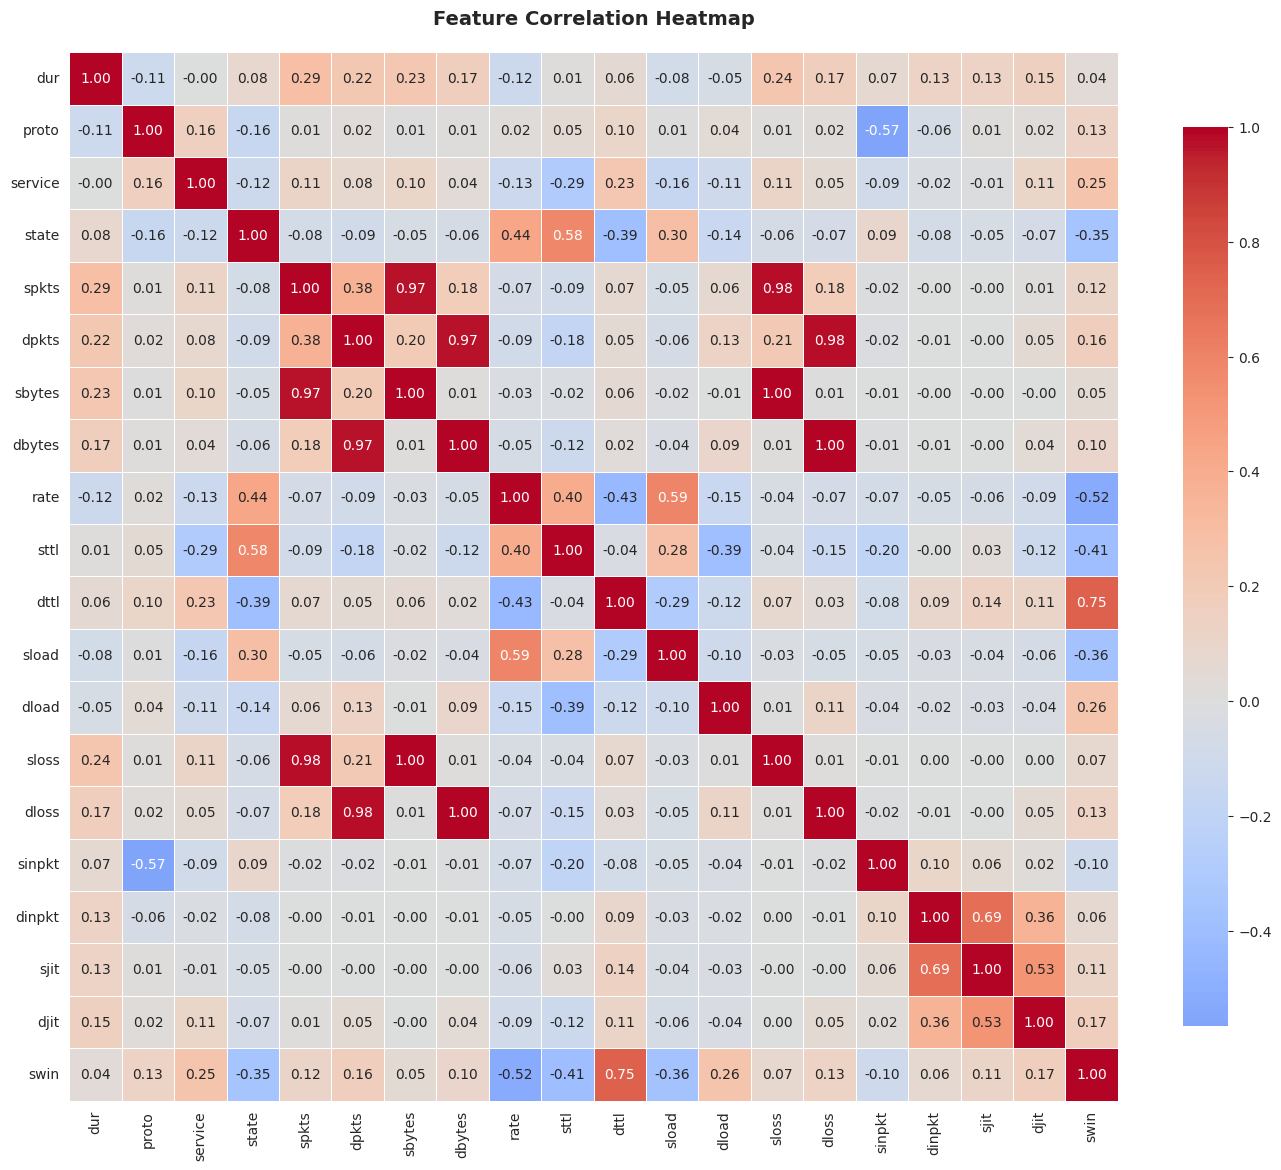

 Correlation heatmap created!

🔍 Highly correlated feature pairs (|r| > 0.8):
   spkts <-> sbytes: 0.971
   spkts <-> sloss: 0.978
   dpkts <-> dbytes: 0.971
   dpkts <-> dloss: 0.976
   sbytes <-> sloss: 0.996
   dbytes <-> dloss: 0.997


In [8]:
# Calculate correlation matrix
# Use a subset of features for better visibility
num_features_to_show = min(20, len(feature_names))
correlation_features = feature_names[:num_features_to_show]

correlation_matrix = df_viz[correlation_features].corr()

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(" Correlation heatmap created!")
print(f"\n🔍 Highly correlated feature pairs (|r| > 0.8):")

# Find highly correlated features
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

if high_corr:
    for feat1, feat2, corr_val in high_corr[:10]:  # Show top 10
        print(f"   {feat1} <-> {feat2}: {corr_val:.3f}")
else:
    print("   No highly correlated pairs found (threshold: |r| > 0.8)")

## Step 8: Visualize Sequence Patterns

Since our model works on sequences, let's visualize how features evolve over time in sequences.

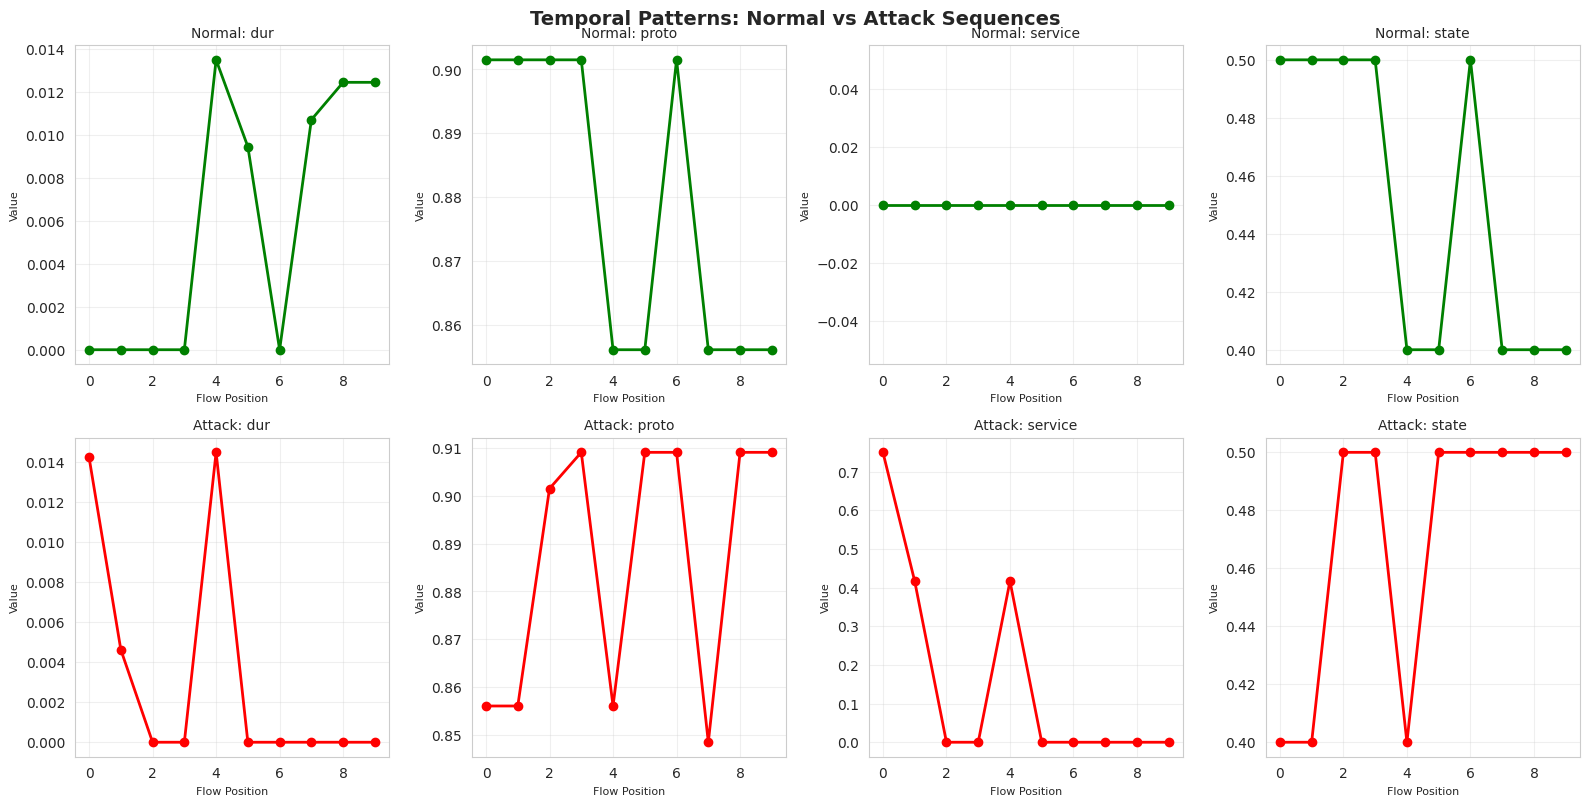

 Sequence patterns visualized!


In [9]:
# Select random normal and attack sequences
normal_idx = np.where(y_train == 0)[0][0]
attack_idx = np.where(y_train == 1)[0][0]

normal_seq = X_train[normal_idx]
attack_seq = X_train[attack_idx]

# Plot first 4 features over the sequence
features_to_show = min(4, len(feature_names))

fig, axes = plt.subplots(2, features_to_show, figsize=(16, 8))

for feat_idx in range(features_to_show):
    # Normal sequence
    axes[0, feat_idx].plot(normal_seq[:, feat_idx], marker='o', color='green', linewidth=2)
    axes[0, feat_idx].set_title(f'Normal: {feature_names[feat_idx]}', fontsize=10)
    axes[0, feat_idx].set_xlabel('Flow Position', fontsize=8)
    axes[0, feat_idx].set_ylabel('Value', fontsize=8)
    axes[0, feat_idx].grid(True, alpha=0.3)
    
    # Attack sequence
    axes[1, feat_idx].plot(attack_seq[:, feat_idx], marker='o', color='red', linewidth=2)
    axes[1, feat_idx].set_title(f'Attack: {feature_names[feat_idx]}', fontsize=10)
    axes[1, feat_idx].set_xlabel('Flow Position', fontsize=8)
    axes[1, feat_idx].set_ylabel('Value', fontsize=8)
    axes[1, feat_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Temporal Patterns: Normal vs Attack Sequences', 
             fontsize=14, fontweight='bold', y=1.002)
plt.show()

print(" Sequence patterns visualized!")

## Step 9: Feature Statistics Summary

Let's create a summary table comparing normal vs attack traffic.

In [10]:
# Calculate statistics for normal and attack traffic
summary_data = []

for feature in features_to_plot:
    normal_data = df_viz[df_viz['class'] == 'Normal'][feature]
    attack_data = df_viz[df_viz['class'] == 'Attack'][feature]
    
    summary_data.append({
        'Feature': feature,
        'Normal Mean': normal_data.mean(),
        'Attack Mean': attack_data.mean(),
        'Normal Std': normal_data.std(),
        'Attack Std': attack_data.std(),
        'Difference': abs(normal_data.mean() - attack_data.mean())
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Difference', ascending=False)

print(" Feature Statistics Summary (sorted by discrimination power):")
print(summary_df.to_string(index=False))

 Feature Statistics Summary (sorted by discrimination power):
Feature  Normal Mean  Attack Mean  Normal Std  Attack Std  Difference
  state     0.373029     0.463752    0.105818    0.059739    0.090722
  proto     0.853822     0.825479    0.106576    0.180241    0.028342
service     0.118603     0.137559    0.204892    0.178389    0.018956
    dur     0.014935     0.023411    0.060934    0.112481    0.008476
  dpkts     0.003158     0.000962    0.009000    0.011069    0.002196
  spkts     0.002615     0.001442    0.005059    0.017022    0.001173


## Step 10: Violin Plots for Dense Distribution View

Violin plots combine box plots with kernel density estimation for richer insights.

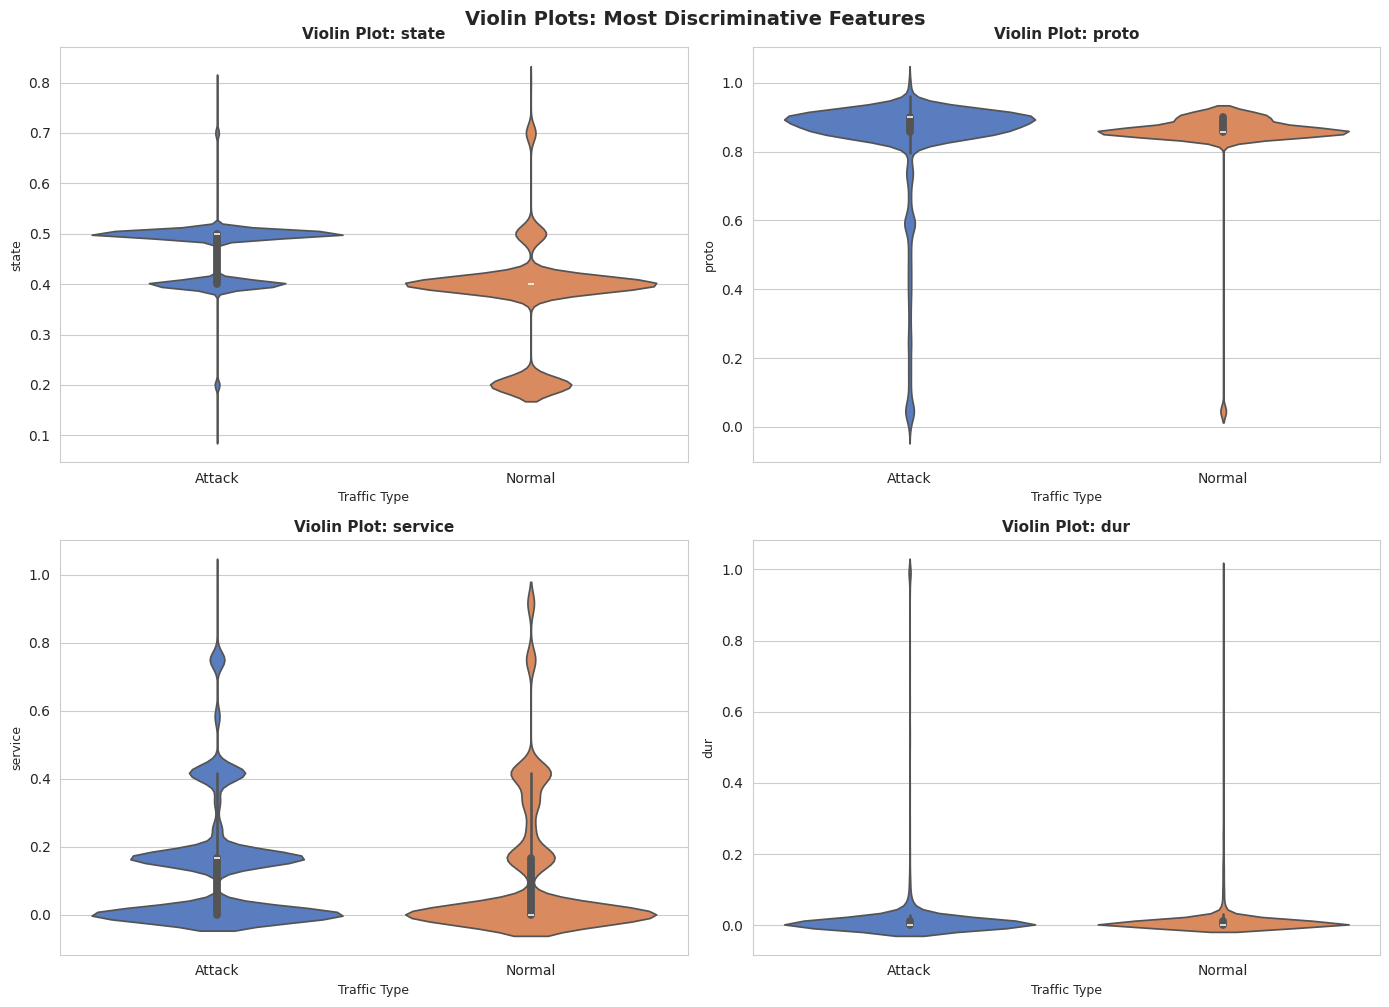

 Violin plots created!


In [11]:
# Create violin plots for top discriminative features
top_features = summary_df.head(4)['Feature'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    sns.violinplot(data=df_viz, x='class', y=feature, ax=axes[idx], palette='muted')
    axes[idx].set_title(f'Violin Plot: {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Traffic Type', fontsize=9)
    axes[idx].set_ylabel(feature, fontsize=9)

plt.tight_layout()
plt.suptitle('Violin Plots: Most Discriminative Features', 
             fontsize=14, fontweight='bold', y=1.002)
plt.show()

print(" Violin plots created!")

##  Summary of Insights

From our exploratory data analysis:

### Key Findings:

1. **Class Distribution**:
   - The dataset shows class imbalance between normal and attack traffic
   - This is realistic for intrusion detection scenarios
   - Our autoencoder approach is well-suited for this imbalance

2. **Feature Discriminability**:
   - Some features show clear differences between normal and attack patterns
   - These will be valuable for the model's learning process

3. **Temporal Patterns**:
   - Sequences show varying patterns over time
   - LSTM will be crucial for capturing these temporal dependencies

4. **Feature Correlations**:
   - Some features are highly correlated (potential redundancy)
   - The CNN layers will help extract relevant combined features

---

##  Next Steps

Proceed to **Notebook 3: Model Training** to:
- Build the CNN+LSTM Autoencoder architecture
- Train the model on normal traffic
- Detect intrusions using reconstruction error
- Evaluate performance with comprehensive metrics

---

**The insights from this visualization will guide our model design and hyperparameter choices!**